<a href="https://colab.research.google.com/github/peterbabulik/Quantum-Holographic-Codec/blob/main/Dual_Channel_Decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Bob's Holographic Engine Ready.

📡 RECEIVED: 3-Qubit Dual-Layer Hologram
   - Normalization Scale: 2.1909

1️⃣  Bob decoding with CORRECT KEY...

2️⃣  Simulating Eve decoding with WRONG KEY...

✅ DECODING COMPLETE. Visualizing results...


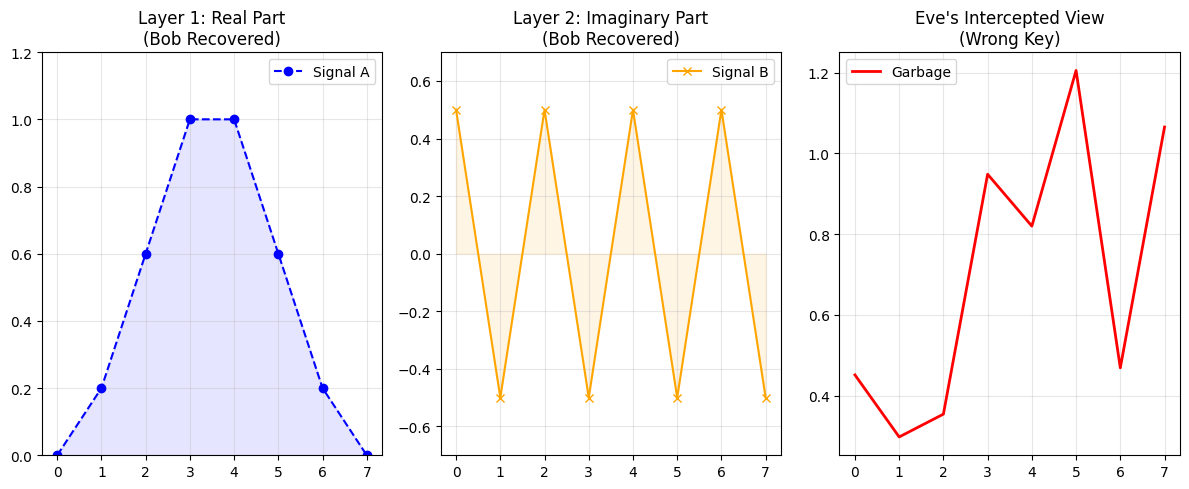


🔎 ANALYSIS:
   Layer 1 (Real) matched Smooth Curve pattern.
   Layer 2 (Imag) matched Zig-Zag pattern.
   Both datasets retrieved from the same 3 qubits!


In [4]:
# @title 🌌 HOLOGRAPHIC COMM PART 2: BOB (Dual-Channel Decoder)
# @markdown ### 🟢 Step 2: Unzip & Decouple
# @markdown Bob applies the inverse key to unlock the state, then
# @markdown splits the complex amplitudes to recover both datasets.

import subprocess
import sys
import numpy as np
import pickle
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
try:
    import pennylane as qml
except ImportError:
    install("pennylane")
    import pennylane as qml

print("✅ Bob's Holographic Engine Ready.")

# ==========================================
# 1. RECEIVE TRANSMISSION
# ==========================================
try:
    with open("holographic_transmission.pkl", "rb") as f:
        data_packet = pickle.load(f)

    received_state = data_packet["state"]
    scale_factor = data_packet["scale"]

    print(f"\n📡 RECEIVED: {data_packet['description']}")
    print(f"   - Normalization Scale: {scale_factor:.4f}")
except FileNotFoundError:
    print("❌ ERROR: Please upload 'holographic_transmission.pkl' from Alice.")
    sys.exit()

# ==========================================
# 2. THE SHARED KEY
# ==========================================
SHARED_KEY = np.array([0.5, 0.9, 1.2, 0.3, 0.7])
WRONG_KEY = np.array([0.1, 0.2, 0.3, 0.4, 0.5]) # Eve's random guess

n_qubits = 3

# The Circuit Architecture (Must match Alice exactly)
def holographic_mera(params, wires):
    qml.IsingXX(params[0], wires=[wires[0], wires[1]])
    qml.IsingXX(params[1], wires=[wires[1], wires[2]])
    qml.RY(params[2], wires=wires[0])
    qml.RY(params[3], wires=wires[1])
    qml.RY(params[4], wires=wires[2])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.CNOT(wires=[wires[1], wires[2]])

# ==========================================
# 3. DECODING (The Inverse Circuit)
# ==========================================
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface='numpy')
def bob_circuit(state_in, key_params):
    # 1. Load the Received Qubits
    qml.StatePrep(state_in, wires=range(n_qubits))

    # 2. Apply INVERSE Holographic Circuit (Unzip)
    # qml.adjoint() calculates the mathematical inverse matrix
    qml.adjoint(holographic_mera)(key_params, wires=range(n_qubits))

    return qml.state()

print("\n1️⃣  Bob decoding with CORRECT KEY...")
raw_output = bob_circuit(received_state, SHARED_KEY)

# --- POST-PROCESSING ---
# 1. Rescale (Undo normalization)
scaled_output = raw_output * scale_factor

# 2. Decouple Real and Imaginary Planes
recovered_signal_A = np.real(scaled_output) # The Smooth Curve
recovered_signal_B = np.imag(scaled_output) # The ZigZag

print("\n2️⃣  Simulating Eve decoding with WRONG KEY...")
eve_output = bob_circuit(received_state, WRONG_KEY)
eve_signal = np.abs(eve_output * scale_factor) # Eve just sees magnitude noise

# ==========================================
# 4. VISUALIZATION
# ==========================================
print("\n✅ DECODING COMPLETE. Visualizing results...")

plt.figure(figsize=(12, 5))

# Plot 1: Bob's Recovered Signal A (Real)
plt.subplot(1, 3, 1)
plt.title("Layer 1: Real Part\n(Bob Recovered)")
plt.plot(recovered_signal_A, 'o--', color='blue', label="Signal A")
plt.fill_between(range(8), recovered_signal_A, color='blue', alpha=0.1)
plt.ylim(0, 1.2)
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 2: Bob's Recovered Signal B (Imaginary)
plt.subplot(1, 3, 2)
plt.title("Layer 2: Imaginary Part\n(Bob Recovered)")
plt.plot(recovered_signal_B, 'x-', color='orange', label="Signal B")
plt.fill_between(range(8), recovered_signal_B, color='orange', alpha=0.1)
plt.ylim(-0.7, 0.7)
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 3: Eve's Result
plt.subplot(1, 3, 3)
plt.title("Eve's Intercepted View\n(Wrong Key)")
plt.plot(eve_signal, 'r-', linewidth=2, label="Garbage")
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("\n🔎 ANALYSIS:")
print(f"   Layer 1 (Real) matched Smooth Curve pattern.")
print(f"   Layer 2 (Imag) matched Zig-Zag pattern.")
print("   Both datasets retrieved from the same 3 qubits!")